Enter a 2-bit message (00, 01, 10, 11) or 'all' to test all:  01



🧩 Superdense Coding Simulation for message: 01


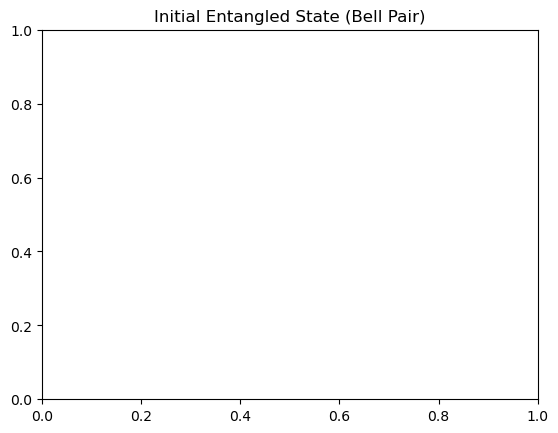

🔍 Circuit Depth: 6
🧮 Gate Count: OrderedDict({'h': 2, 'cx': 2, 'barrier': 2, 'measure': 2, 'x': 1})
📊 Measurement Results: {'10': 1024}



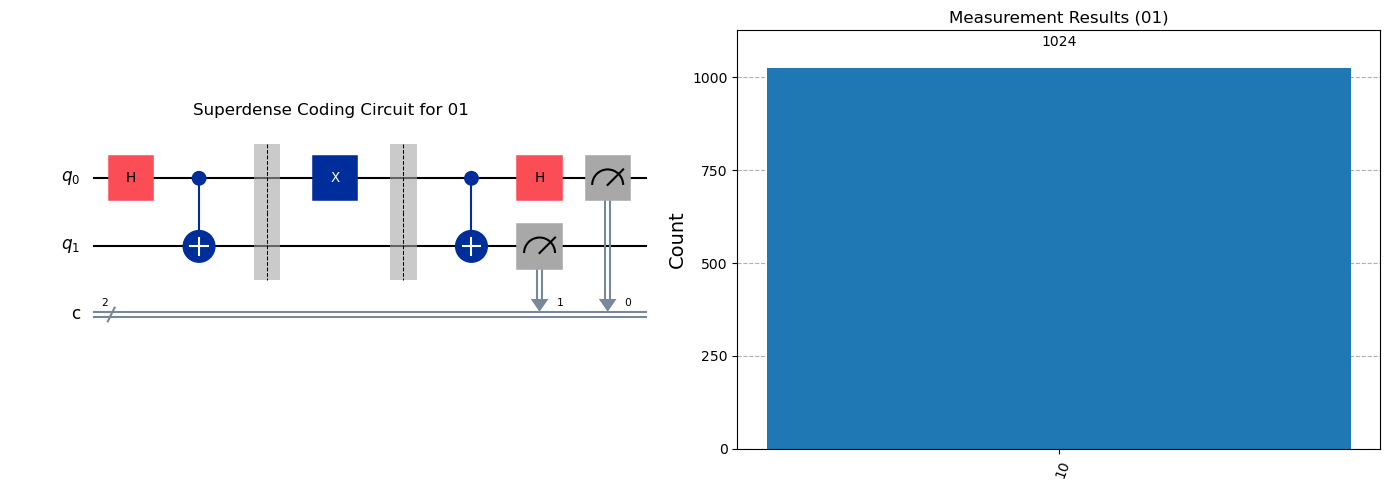

In [1]:
# Enhanced Superdense Coding Simulation with Extra Features
# Author: <Your Name>
# Date: 2025-10-17

from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import (
    plot_histogram, plot_bloch_multivector, plot_state_city
)
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt


# Step 1: Create entanglement (shared Bell pair)
def create_entanglement():
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    return qc


# Step 2: Encode the 2-bit message on Alice's qubit
def encode_message(qc, bits):
    if bits == '01':
        qc.x(0)
    elif bits == '10':
        qc.z(0)
    elif bits == '11':
        qc.x(0)
        qc.z(0)
    # '00' means no operation
    return qc


# Step 3: Bob decodes Alice's message
def decode_message(qc):
    qc.cx(0, 1)
    qc.h(0)
    qc.measure([0, 1], [0, 1])
    return qc


# Main function
def superdense_coding(bits, show_plots=True):
    if len(bits) != 2 or any(b not in ['0', '1'] for b in bits):
        raise ValueError("Input must be a 2-bit string like '00','01','10','11'")

    print(f"\n🧩 Superdense Coding Simulation for message: {bits}")

    # Step 1: Entanglement
    qc = create_entanglement()
    qc.barrier()

    # Display the initial entangled state
    state_entangled = Statevector.from_instruction(qc)
    if show_plots:
        plot_bloch_multivector(state_entangled)
        plt.title("Initial Entangled State (Bell Pair)")
        plt.show()

    # Step 2: Alice encodes
    encode_message(qc, bits)
    qc.barrier()

    # Show state after Alice's encoding
    state_encoded = Statevector.from_instruction(qc)
    if show_plots:
        plot_state_city(state_encoded, title=f"Quantum State After Encoding ({bits})")
        plt.show()

    # Step 3: Bob decodes
    decode_message(qc)

    # Simulation
    sim = Aer.get_backend('aer_simulator')
    job = sim.run(qc)
    result = job.result()
    counts = result.get_counts()

    # Circuit analysis
    depth = qc.depth()
    gate_count = qc.count_ops()
    print(f"🔍 Circuit Depth: {depth}")
    print(f"🧮 Gate Count: {gate_count}")
    print(f"📊 Measurement Results: {counts}\n")

    # Visualization
    if show_plots:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        qc.draw('mpl', ax=axes[0])
        axes[0].set_title(f'Superdense Coding Circuit for {bits}')
        plot_histogram(counts, ax=axes[1])
        axes[1].set_title(f'Measurement Results ({bits})')
        plt.tight_layout()
        plt.show()


# Option 1: Interactive single input
def run_interactive():
    user_choice = input("Enter a 2-bit message (00, 01, 10, 11) or 'all' to test all: ").strip()
    if user_choice.lower() == 'all':
        for msg in ['00', '01', '10', '11']:
            superdense_coding(msg)
    else:
        superdense_coding(user_choice)


# Option 2: Run all automatically (uncomment below line if preferred)
# for msg in ['00', '01', '10', '11']:
#     superdense_coding(msg)

# Run interactively
if __name__ == "__main__":
    run_interactive()
